In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import sklearn.metrics
import matplotlib.patches as patches

In [2]:
cal = pd.read_csv('/Users/chen/Desktop/boston-airbnb-open-data/calendar.csv')
lis = pd.read_csv('/Users/chen/Desktop/boston-airbnb-open-data/listings.csv')
rev = pd.read_csv('/Users/chen/Desktop/boston-airbnb-open-data/reviews.csv')

In [3]:
cal.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [4]:
lis.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


In [5]:
lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
rev.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [7]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(lis.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [8]:
lis[['price','weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].head(10)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$250.00,NaN,NaN,NaN,$35.00
1,$65.00,$400.00,NaN,$95.00,$10.00
2,$65.00,$395.00,"$1,350.00",NaN,NaN
3,$75.00,NaN,NaN,$100.00,$50.00
4,$79.00,NaN,NaN,NaN,$15.00
5,$75.00,NaN,NaN,NaN,$30.00
6,$100.00,NaN,NaN,NaN,NaN
7,$75.00,NaN,NaN,NaN,$10.00
8,$58.00,NaN,NaN,NaN,NaN
9,$229.00,NaN,NaN,$200.00,$50.00


In [9]:
price_lis = ['price','weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']
for term in price_lis:
    lis[term] = lis[term].str.replace('$','').str.replace(',','').astype(float)

In [10]:
lis[['price','weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']].head(10)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,250.0,NaN,NaN,NaN,35.0
1,65.0,400.0,NaN,95.0,10.0
2,65.0,395.0,1350.0,NaN,NaN
3,75.0,NaN,NaN,100.0,50.0
4,79.0,NaN,NaN,NaN,15.0
5,75.0,NaN,NaN,NaN,30.0
6,100.0,NaN,NaN,NaN,NaN
7,75.0,NaN,NaN,NaN,10.0
8,58.0,NaN,NaN,NaN,NaN
9,229.0,NaN,NaN,200.0,50.0


In [11]:
lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


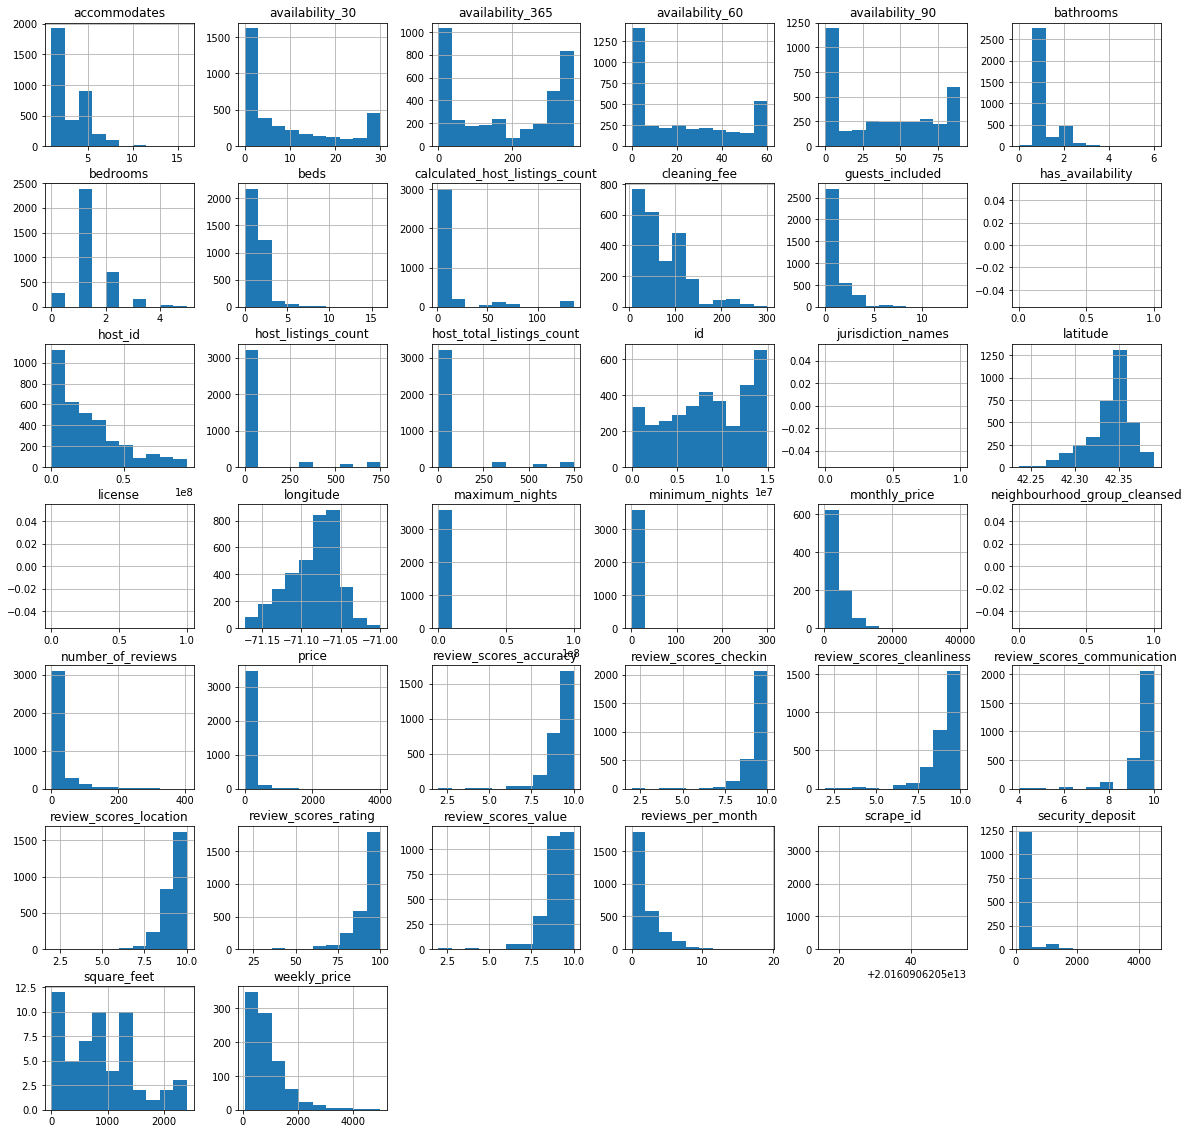

In [12]:
lis.hist(figsize = (20,20));

# Problem #1 Let's guess what correlates with price?

From the guessing, we think below terms are correlated with price.

In [13]:
price_relate_lis = lis[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_total_listings_count', 'cleaning_fee', 'host_listings_count',
                        'square_feet','price','guests_included', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_rating']]

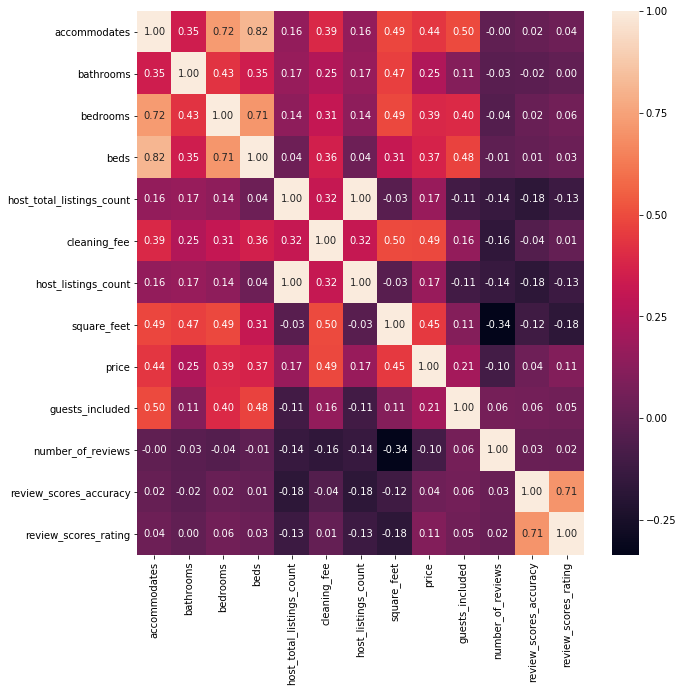

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(price_relate_lis.corr(), annot=True, fmt=".2f");

From the figure we can get that "price" is more correlated with "cleaning fee", "square feet", "accommodates", "bedrooms", and "beds".
And also "accommodates" is highly correlated with "beds", and "bedrooms".

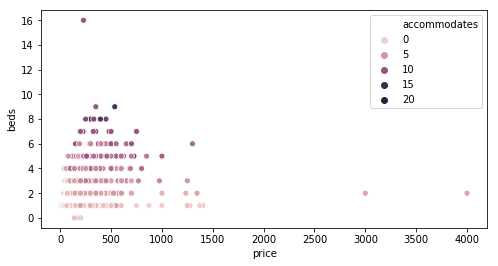

In [15]:
plt.figure(figsize = (8, 4));
sns.scatterplot(x='price', y='beds', hue = 'accommodates', data=lis);

In [16]:
price_relate_lis.isnull().mean().sort_values(ascending = False)

square_feet                  0.984379
cleaning_fee                 0.308787
review_scores_accuracy       0.229568
review_scores_rating         0.226778
bathrooms                    0.003905
bedrooms                     0.002789
beds                         0.002510
number_of_reviews            0.000000
guests_included              0.000000
price                        0.000000
host_listings_count          0.000000
host_total_listings_count    0.000000
accommodates                 0.000000
dtype: float64

From the output we can know, there are too many missing values in "square_feet", so we will not use this data.

In [17]:
price_relate_lis = price_relate_lis.drop(["square_feet"], axis = 1)

"review_scores_accuracy" and "review_scores_rating" are similar factors, so we only take one.

In [18]:
price_relate_lis = price_relate_lis.drop(["review_scores_accuracy"], axis = 1)

# Probelm #2 Try to use the data we have to predict the price

At first we should clean the data because there are many miss values.

In [19]:
def clean_data(df):
    Y = df.price
    
    df = df.drop('price', axis = 1)
    
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    
    X = df
    
    return X, Y

In [20]:
X, Y = clean_data(price_relate_lis)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train) 

Y_test_preds = model.predict(X_test) 
Y_train_preds = model.predict(X_train)

test_score = r2_score(Y_test, Y_test_preds)
train_score = r2_score(Y_train, Y_train_preds)

print(test_score, train_score)

0.19830989966493806 0.28143277812356615


From the result we can see only use these data to predict the price is not enough, that means there are more things related with price

In [21]:
a = lis.room_type.value_counts()
a

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

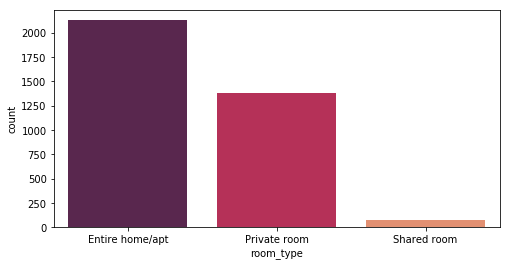

In [22]:
plt.figure(figsize = (8,4))

sns.countplot(x = 'room_type', data = lis, palette='rocket') 
plt.show()

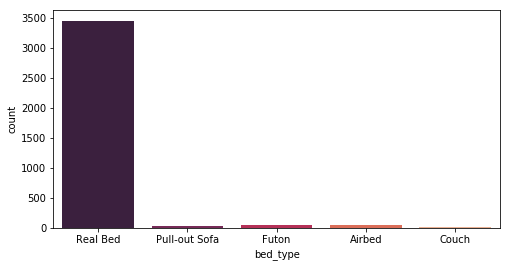

In [23]:
plt.figure(figsize = (8,4))

sns.countplot(x = 'bed_type', data = lis, palette='rocket') 
plt.show()

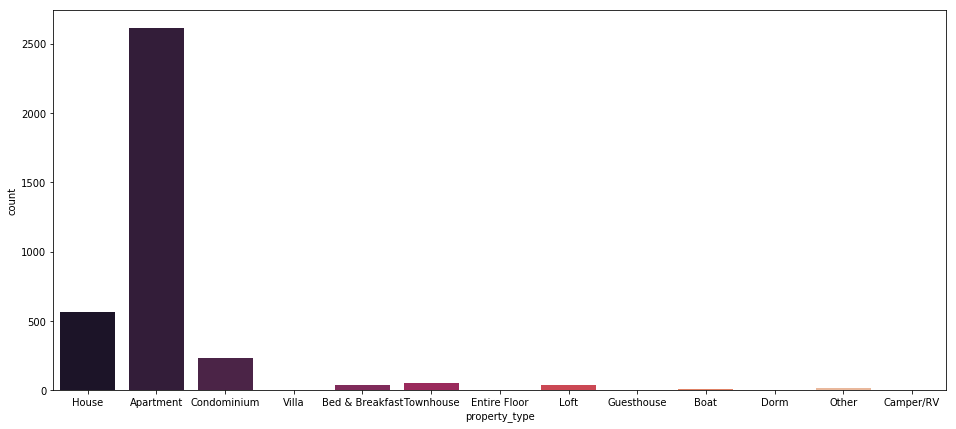

In [24]:
plt.figure(figsize = (16,7))

sns.countplot(x = 'property_type', data = lis, palette='rocket') 
plt.show()

In [25]:
lis['amenities'].head()

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [26]:
lis['amenities'].map(lambda amns: amns.strip('{}').replace('"', '').split(',')).head()

0    [TV, Wireless Internet, Kitchen, Free Parking ...
1    [TV, Internet, Wireless Internet, Air Conditio...
2    [TV, Cable TV, Wireless Internet, Air Conditio...
3    [TV, Internet, Wireless Internet, Air Conditio...
4    [Internet, Wireless Internet, Air Conditioning...
Name: amenities, dtype: object

In [27]:
np.unique(np.concatenate(lis['amenities'].map(lambda amns: amns.strip('{}').replace('"', '').split(','))))[1:]

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises',
       'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers',
       'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'], dtype='<U42')

In [28]:
amenities = np.unique(np.concatenate(lis['amenities'].map(lambda amns: amns.strip('{}').replace('"', '').split(','))))[1:]
amenity_arr = np.array([lis['amenities'].map(lambda amns: amn in amns) for amn in amenities])
amenity_arr

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [False, False,  True, ...,  True, False,  True],
       [False, False,  True, ...,  True,  True,  True]])

In [29]:
price_relate_lis = pd.concat([price_relate_lis, pd.DataFrame(data=amenity_arr.T, columns=amenities)], axis=1)

In [30]:
for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    price_relate_lis[tf_feature] = lis[tf_feature].map(lambda s: False if s == "f" else True)


In [31]:
for categorical_feature in ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']:
    price_relate_lis = pd.concat([price_relate_lis, pd.get_dummies(lis[categorical_feature])], axis=1)

In [32]:
price_relate_lis.head()

,accommodates,bathrooms,bedrooms,beds,host_total_listings_count,cleaning_fee,host_listings_count,price,guests_included,number_of_reviews,...,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,4,1.5,2.0,3.0,1,35.0,1,250.0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1.0,1.0,1.0,1,10.0,1,65.0,0,36,...,0,0,0,1,0,0,0,0,0,1
2,2,1.0,1.0,1.0,1,NaN,1,65.0,1,41,...,0,0,0,1,0,0,0,0,0,1
3,4,1.0,1.0,2.0,1,50.0,1,75.0,2,1,...,0,0,0,1,0,0,0,0,0,1
4,2,1.5,1.0,2.0,1,15.0,1,79.0,1,29,...,0,0,0,1,0,0,0,0,0,1


In [33]:
for col in price_relate_lis.columns[price_relate_lis.isnull().any()]:
    print(col)

bathrooms
bedrooms
beds
cleaning_fee
review_scores_rating


In [34]:
for col in price_relate_lis.columns[price_relate_lis.isnull().any()]:
    price_relate_lis[col] = price_relate_lis[col].fillna(price_relate_lis[col].mean())

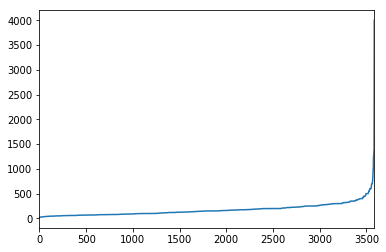

In [35]:
price_relate_lis['price'].sort_values().reset_index(drop=True).plot()

Exploring our dataset earlier (in Exploring Price) showed that though the extremely high-value rentals may sometimes be actual mansions or whatnot for rent, for the most part they're scalpers setting unrealistic valuations or just joke listings. These will throw off our model if we include them, by a lot.

Exploring Price showed that a price ceiling of around 600 per day was reasonable, so let's use that here.

In [36]:
features = price_relate_lis.query('price <= 600')

In [37]:
features = features.drop('cleaning_fee', axis = 1)

Now use LInearRegression as the model to predic the price.

In [38]:
X, Y = clean_data(features)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

model = LinearRegression()
model.fit(X, Y) 

Y_preds = model.predict(X_test)

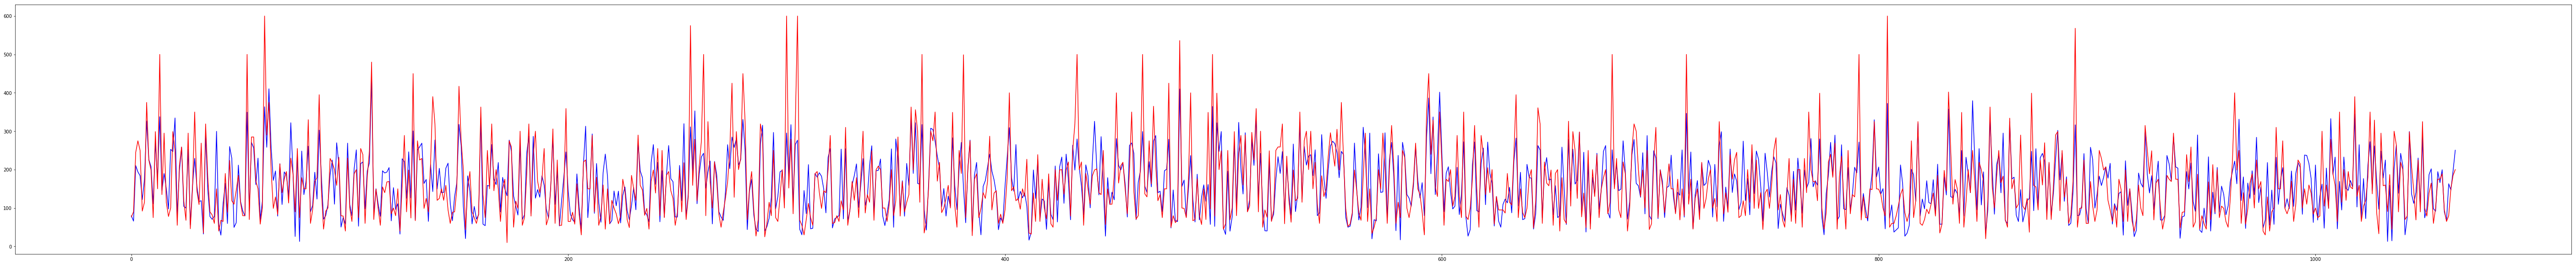

In [41]:
plt.figure(figsize = (100,10))
plt.plot(range(len(Y_preds)),Y_preds,'b',label="predict")
plt.plot(range(len(Y_preds)),Y_test,'r',label="test")

In [42]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_preds)
mse

3570.0803295277346

In [43]:
root_mse = mse**(1/2)
root_mse

59.750149200882625

From the output we can know that our classifier is wrong by that much on average.

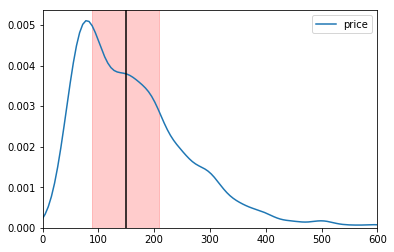

In [44]:
sns.kdeplot(Y)
ax = plt.gca()
ax.set_xlim([0, 600])
plt.axvline(Y.median(), c='black')
ax.add_patch(
    patches.Rectangle((Y.median() - root_mse, 0), 2*root_mse, 0.006,
                      color='r', alpha=0.2)
)

## Problem #3 Observe the output that we got from the model

In [45]:
coefs = list(zip(model.coef_, features.drop('price', axis=1)))
coefs

[(6.4144299953984305, 'accommodates'),
 (11.2712534427878, 'bathrooms'),
 (35.672142745849435, 'bedrooms'),
 (2.771839879094074, 'beds'),
 (-0.004374762380169983, 'host_total_listings_count'),
 (-0.004374760791744592, 'host_listings_count'),
 (6.483108413243116, 'guests_included'),
 (-0.19647100367947967, 'number_of_reviews'),
 (0.1968161691339212, 'review_scores_rating'),
 (-9.151099671059338, '24-Hour Check-in'),
 (10.98312563094286, 'Air Conditioning'),
 (9.147683141192687, 'Breakfast'),
 (1.2423851743461491, 'Buzzer/Wireless Intercom'),
 (3.601719106832483, 'Cable TV'),
 (2.6711702266848327, 'Carbon Monoxide Detector'),
 (-10.264854519890257, 'Cat(s)'),
 (1.1980433995135331, 'Dog(s)'),
 (19.5944477341107, 'Doorman'),
 (-0.7626373905415156, 'Dryer'),
 (7.192653700077933, 'Elevator in Building'),
 (-2.6565016718102927, 'Essentials'),
 (1.8669835268526143, 'Family/Kid Friendly'),
 (-0.9985225148627521, 'Fire Extinguisher'),
 (3.632620859844567, 'First Aid Kit'),
 (-8.341247594535545, 

According to our model, every additional bedroom you want to rent will charge you an additional 35 dollars, while each additional bathroom will cost 11 dollars extra.

And each additional bed is just 3 dollars extra, and each additional accommodation and guest included costs 6. That means if you wanna bring more friends, it won't cost you a lot. Airbnb is very cost-efficient.

About the reviews, we can see that no matter is the ratings or the number of reviews almost won't affect the price. This is surprising.

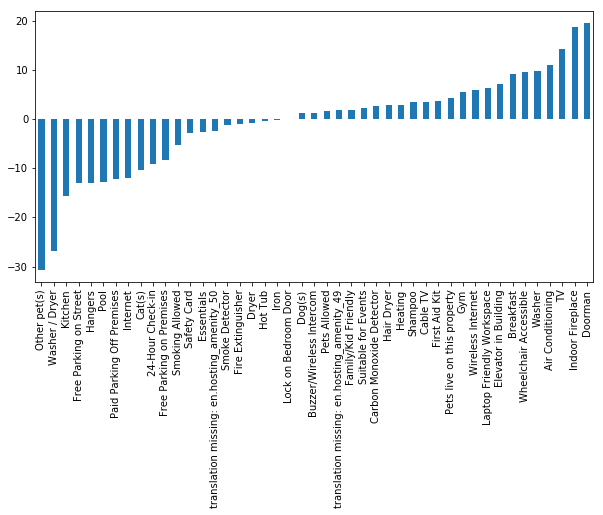

In [46]:
amenity_effects = [v for v in coefs if v[1] in amenities]
pd.Series(data=[n[0] for n in amenity_effects],
          index=[n[1] for n in amenity_effects]).sort_values().plot(kind='bar', figsize = (10,5))

Like my thinking, more amenities are always better: every additional amenity available at a location will theoretically be a big plus for people who want it and a not-negative for those who don't. Hence on an individual level, there's an incentive for a host to list irons, hot tubs, kitchens, the works.

However, what a host chooses to list as an amenity is a signal about the "class" of the listing. If you put something "necessary" like "hangers" in your list maybe mean that you don't have something else necessary like hangers. So it will lead to a lower price.

In [47]:
neighborhoods = np.unique(lis['neighbourhood_cleansed'])
neighborhood_effects = [v for v in coefs if v[1] in neighborhoods]

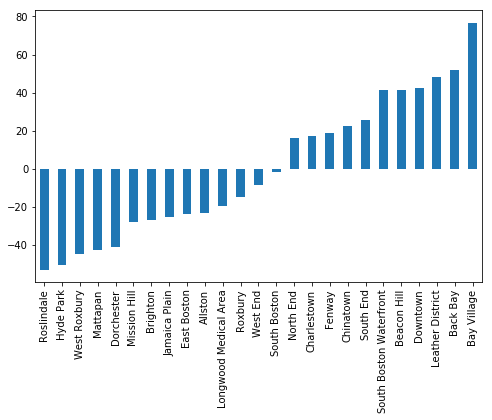

In [48]:
pd.Series(data=[n[0] for n in neighborhood_effects],
          index=[n[1] for n in neighborhood_effects]).sort_values().plot(kind='bar', figsize = (8,5))

We see that neighborhood does indeed have a strong effect on the price of a listing. Far from the city center neighborhoods cost 40 dollars or less than average to rent in. Also, 40 dollars a night over the average seems like the premium you pay to live in a nice location.